<a href="https://colab.research.google.com/github/alexander-billings/dark_web_prices/blob/main/Makeover_Monday_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Makeover Monday Challenge

The purpose of this notebook is to take an existing dataset and visualization, then improve upon it. The attached article mostly had tables to show data so I would like to take the opportunity to create some visualizations to accompany them.

Original Data: https://www.privacyaffairs.com/dark-web-price-index-2021/

## Setup

In [72]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

filename = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTM_i-rKg8OqVooIkDZJLS1Cqpufu91OGoB8bbKfeH6cnoBoR3Rdjw9gTYZt_QGTSQ-EenJc8pAEK8Z/pub?output=csv"
df = pd.read_csv(filename)

In [2]:
df.head()

,category,product,avg_dark_web_price_usd
0,Credit Card Data,Cloned Mastercard with PIN,25
1,Credit Card Data,Cloned American Express with PIN,35
2,Credit Card Data,Cloned VISA with PIN,25
3,Credit Card Data,"Credit card details, account balance up to $1,000",150
4,Credit Card Data,"Credit card details, account balance up to $5,000",240


In [3]:
df.info

<bound method DataFrame.info of              category  ... avg_dark_web_price_usd
0    Credit Card Data  ...                     25
1    Credit Card Data  ...                     35
2    Credit Card Data  ...                     25
3    Credit Card Data  ...                    150
4    Credit Card Data  ...                    240
..                ...  ...                    ...
123      DDOS Attacks  ...                     50
124      DDOS Attacks  ...                    500
125      DDOS Attacks  ...                   1000
126      DDOS Attacks  ...                    320
127      DDOS Attacks  ...                    200

[128 rows x 3 columns]>

## Exploratory Analysis

I'm only interesting in the Credit Card Data category in this Notebook

In [4]:
df['category'].unique()

array(['Credit Card Data', 'Payment processing services',
       'Crypto Accounts', 'Social Media', 'Hacked Services',
       'Forged Documents – Scans', 'Forged Documents – Physical',
       'Email Database Dumps', 'Malware', 'DDOS Attacks'], dtype=object)

In [5]:
# Checking what products are available under "Credit Card Data"
cc_filter = df['category'] == 'Credit Card Data'
df[cc_filter]

,category,product,avg_dark_web_price_usd
0,Credit Card Data,Cloned Mastercard with PIN,25
1,Credit Card Data,Cloned American Express with PIN,35
2,Credit Card Data,Cloned VISA with PIN,25
3,Credit Card Data,"Credit card details, account balance up to $1,000",150
4,Credit Card Data,"Credit card details, account balance up to $5,000",240
5,Credit Card Data,"Stolen online banking logins, minimum $100 on ...",40
6,Credit Card Data,"Stolen online banking logins, minimum $2,000 o...",120
7,Credit Card Data,Walmart account with credit card attached,14
8,Credit Card Data,Hacked (Global) credit card details with CVV,35
9,Credit Card Data,USA hacked credit card details with CVV,17


##Question:

Is there a particular brand of card that is more valuable than others? The above data shows this is the case. Let's put it in a visualization for easier reading.

In [7]:
# Cloned cards stand out as an interesting area
cloned_cards = df.iloc[0:3]

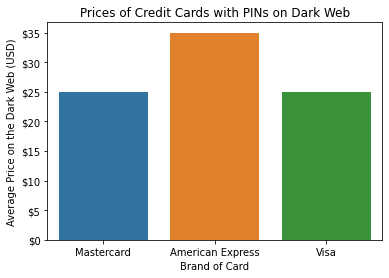

In [86]:
sns.color_palette("tab10")
ax = sns.barplot(data=cloned_cards, ci=False, y='avg_dark_web_price_usd', x='product', orient='v')
ax.set_xticklabels(['Mastercard', 'American Express', 'Visa'])

# Adds dollar sign
fmt = '${x:.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.title("Prices of Credit Cards with PINs on Dark Web")
plt.xlabel("Brand of Card")
plt.ylabel("Average Price on the Dark Web (USD)");

##Conclusions

* It would be interesting to know why AmEx cards are more valuable
* Processing AmEx cards might incur higher risk of Cybercrime
* According to [this](https://www.creditcards.com/credit-card-news/market-share-statistics/) article from creditcards.com, market share between AmEx and Mastercard are similar so market share does not seem to be the driver in value discrepency 